<a href="https://colab.research.google.com/github/Tek-99/HackStreet3.0/blob/main/OilSpillDetection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT REQUIRED KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.

import kagglehub
sudhanshu2198_oil_spill_detection_path = kagglehub.dataset_download('sudhanshu2198/oil-spill-detection')
msudeepjoel_noaa_incidents_oilspill_path = kagglehub.dataset_download('msudeepjoel/noaa-incidents-oilspill')

print('Data source import complete.')


100%|██████████| 77.5k/77.5k [00:00<00:00, 45.3MB/s]

Extracting files...


100%|██████████| 978k/978k [00:00<00:00, 46.7MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing & CSV file I/O

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but the wont be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import math
import warnings
import string

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

#RND Forest
from sklearn.ensemble import RandomForestClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC,SVC

# Seaborn
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
# Install Kaggle library
!pip install kaggle

# Upload kaggle.json file
from google.colab import files
files.upload()  # Upload your kaggle.json file

# Move kaggle.json to appropriate directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d sudhanshu2198/oil-spill-detection

# Unzip the downloaded dataset
!unzip oil-spill-detection.zip  # Adjust based on actual zip file name

Saving oil_spill.csv to oil_spill.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection
License(s): CC0-1.0
  0% 0.00/77.5k [00:00<?, ?B/s]
100% 77.5k/77.5k [00:00<00:00, 59.9MB/s]
Archive:  oil-spill-detection.zip
replace oil_spill.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: oil_spill.csv           


In [5]:
# Step 2: Load and inspect the dataset
data = pd.read_csv("oil_spill.csv")

# Show the first few rows to inspect the dataset
data.head()  # First few rows

# Show the last few rows to inspect the dataset
data.tail()  # Last few rows


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0
936,204,11,7.73,235.73,135,89100,61.82,12.24,831.0,0.20,...,254.56,254.56,127.28,180.00,2.00,0,3782.68,65.65,6.26,0


In [6]:

data_cleaned = data.dropna()
X = data_cleaned.drop(columns=['target'])  # Assuming 'spill' is the target column
y = data_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Step 4: Extract features (X) and target (y)
X = data_cleaned.drop(columns=['target'])  # Assuming 'spill' is the target column
y = data_cleaned['target']

In [8]:
# Step 5: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 6: Standardize the features (important for some classifiers like Logistic Regression, SVM)
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Step 7: Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 8: Train and evaluate each classifier
results = []
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict the target variable on the test set
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tpr = cm[1][1] / (cm[1][0] + cm[1][1])  # True Positive Rate (Sensitivity)

    # Record the results for comparison
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Sensitivity': tpr,
        'Objective Value': accuracy + tpr * 0.25  # Objective value combines accuracy and sensitivity
    })

# Convert results into a DataFrame for easier inspection
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Sensitivity,Objective Value
0,Logistic Regression,0.968085,0.500000,1.093085
1,Random Forest,0.968085,0.333333,1.051418
2,Gradient Boosting,0.978723,0.833333,1.187057
3,SVM,0.973404,0.166667,1.015071
4,Decision Tree,0.968085,0.666667,1.134752


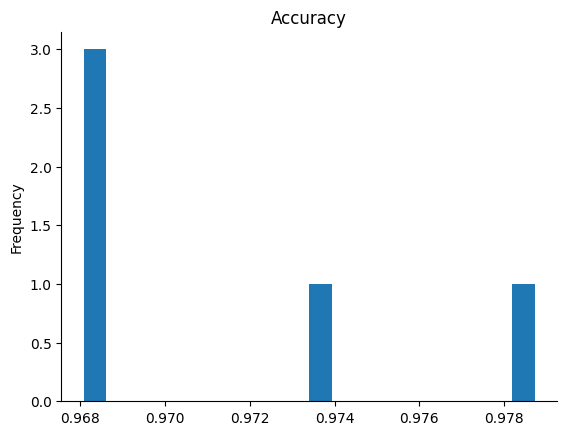

In [11]:
# @title Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

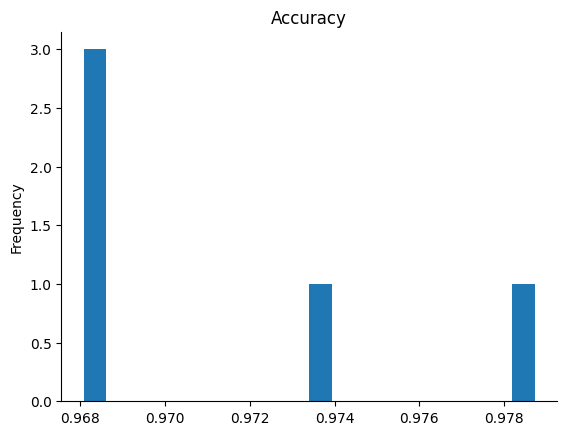

In [12]:
# @title Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

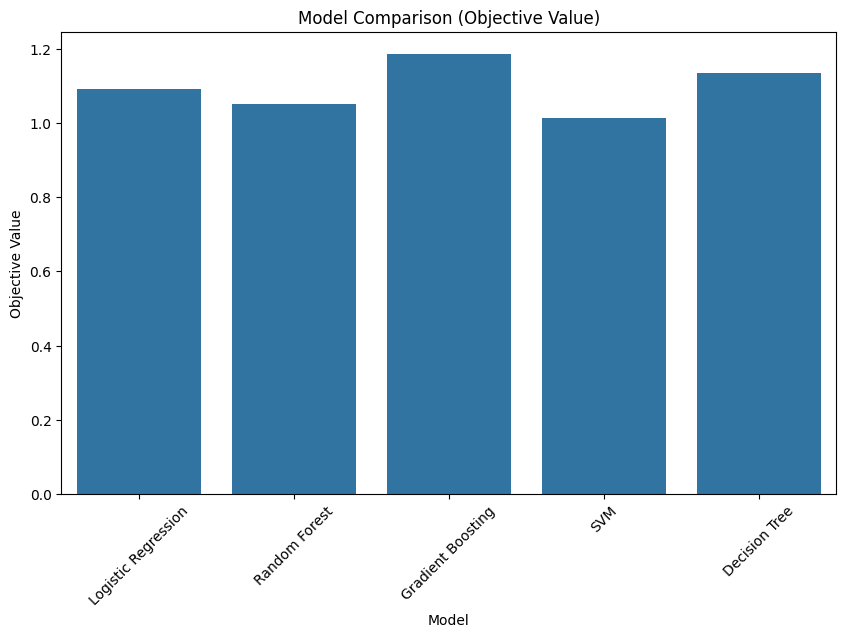

In [13]:
# Step 9: Plot a comparison of objective values for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Objective Value', data=results_df)
plt.title('Model Comparison (Objective Value)')
plt.ylabel('Objective Value')
plt.xticks(rotation=45)
plt.show()

Best Model: Gradient Boosting

Confusion Matrix:
 [[179   3]
 [  1   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.62      0.83      0.71         6

    accuracy                           0.98       188
   macro avg       0.81      0.91      0.85       188
weighted avg       0.98      0.98      0.98       188



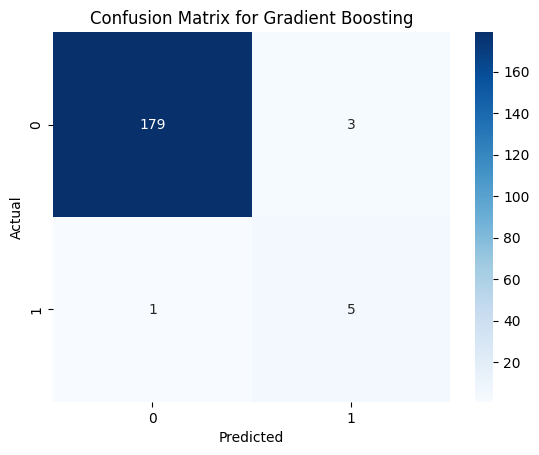

In [14]:
# Step 10: Identify the best model based on the highest objective value
best_model_name = results_df.loc[results_df['Objective Value'].idxmax(), 'Model']
best_model = classifiers[best_model_name]

# Step 11: Predict using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Display confusion matrix and classification report
print(f"Best Model: {best_model_name}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Plot confusion matrix for the best model
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [15]:
# Step 12: Hyperparameter tuning using GridSearchCV (optional but can improve performance)
param_grid = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'SVM': {'C': [1, 10], 'kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'Decision Tree': {'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    # Add hyperparameters for other classifiers as needed
}

# Select the best model for tuning
best_model_for_tuning = best_model_name

# GridSearchCV for Random Forest as an example
if best_model_for_tuning == 'Random Forest':
    grid_search = GridSearchCV(classifiers['Random Forest'], param_grid['Random Forest'], cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Display the best parameters and the best score
    print(f"Best Parameters for {best_model_for_tuning}: {grid_search.best_params_}")
    print(f"Best Cross-validation Score: {grid_search.best_score_}")


In [16]:
# Step 13: Conclusion
# Based on the results, we will conclude which model performed the best for oil spill detection.
from google.colab import files
# Display final comparison of models (accuracy and sensitivity)
print(results_df)

# Summarize the best model and its key metrics
best_model_summary = results_df.loc[results_df['Objective Value'].idxmax()]
print(f"Best Model: {best_model_summary['Model']}")
print(f"Accuracy: {best_model_summary['Accuracy']:.2f}")
print(f"Sensitivity: {best_model_summary['Sensitivity']:.2f}")
print(f"Objective Value: {best_model_summary['Objective Value']:.2f}")

# Optionally, save the model if it performs well and you want to deploy it
import joblib
joblib.dump(best_model, 'best_oil_spill_model.pkl')
files.download('best_oil_spill_model.pkl')

                 Model  Accuracy  Sensitivity  Objective Value
0  Logistic Regression  0.968085     0.500000         1.093085
1        Random Forest  0.968085     0.333333         1.051418
2    Gradient Boosting  0.978723     0.833333         1.187057
3                  SVM  0.973404     0.166667         1.015071
4        Decision Tree  0.968085     0.666667         1.134752
Best Model: Gradient Boosting
Accuracy: 0.98
Sensitivity: 0.83
Objective Value: 1.19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import joblib
import pandas as pd

# Step 1: Load your trained Gradient Boosting model
model_path = 'best_oil_spill_model.pkl'  # Replace with your actual model path
best_model = joblib.load(model_path)

# Step 2: Load your dataset containing features for prediction
data_path = 'oil_spill.csv'  # Replace with your actual data path
data = pd.read_csv(data_path)

# Step 3: Prepare the feature set for predictions
# Assuming your features are named f1 to f49
feature_columns = [f'f_{i}' for i in range(1, 50)]  # f1 to f49

# Check if all required feature columns exist in the DataFrame
missing_features = [col for col in feature_columns if col not in data.columns]
if missing_features:
    print(f"Warning: Missing feature columns: {missing_features}")

# Prepare features for predictions, dropping rows with NaN values in these columns
features = data[feature_columns].dropna()

# Ensure we have the correct number of features (49)
if features.shape[1] != 49:
    print(f"Warning: Expected 49 features, but got {features.shape[1]} features.")
else:
    # Step 4: Make predictions
    predictions = best_model.predict(features)

    # Step 5: Add predictions to the original DataFrame
    data['Predicted Spill'] = None  # Initialize column
    data.loc[features.index, 'Predicted Spill'] = predictions  # Assign predictions to the corresponding rows

    # Display results where spills are predicted (assuming '1' indicates a spill)
    predicted_spills = data[data['Predicted Spill'] == 1]
    print(predicted_spills)

    # Optionally, save results with predictions to a new CSV file
    data.to_csv('predicted_oil_spills.csv', index=False)

    from google.colab import files

# Download the CSV file
files.download('predicted_oil_spills.csv')


     f_1    f_2      f_3      f_4  f_5       f_6    f_7    f_8      f_9  f_10  \
1      2  22325    79.11   841.03  180  55812500  51.11   1.21  61900.0  0.02   
7      8     57    28.68   715.39  141    142500  51.67   0.83   1810.0  0.02   
9     10     64   903.02   274.88   33    160000  41.22   7.90   1850.0  0.19   
10    11     59  1127.41  1507.76   42    147500  47.59   4.72   1800.0  0.10   
11     1    329  1627.54  1409.43   51    822500  35.00   6.10   4610.0  0.17   
..   ...    ...      ...      ...  ...       ...    ...    ...      ...   ...   
932  200     12    92.42   364.42  135     97200  59.42  10.34    884.0  0.17   
933  201     11    98.82   248.64  159     89100  59.64  10.18    831.0  0.17   
934  202     14    25.14   428.86   24    113400  60.14  17.94    847.0  0.30   
935  203     10    96.00   451.30   68     81000  59.90  15.01    831.0  0.25   
936  204     11     7.73   235.73  135     89100  61.82  12.24    831.0  0.20   

     ...      f_42     f_43

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>